# Dictionaries<a href="https://colab.research.google.com/github/milocortes/python_course_summer_school_DMDU_2022/blob/main/notebooks/dictionaries_dmdu_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
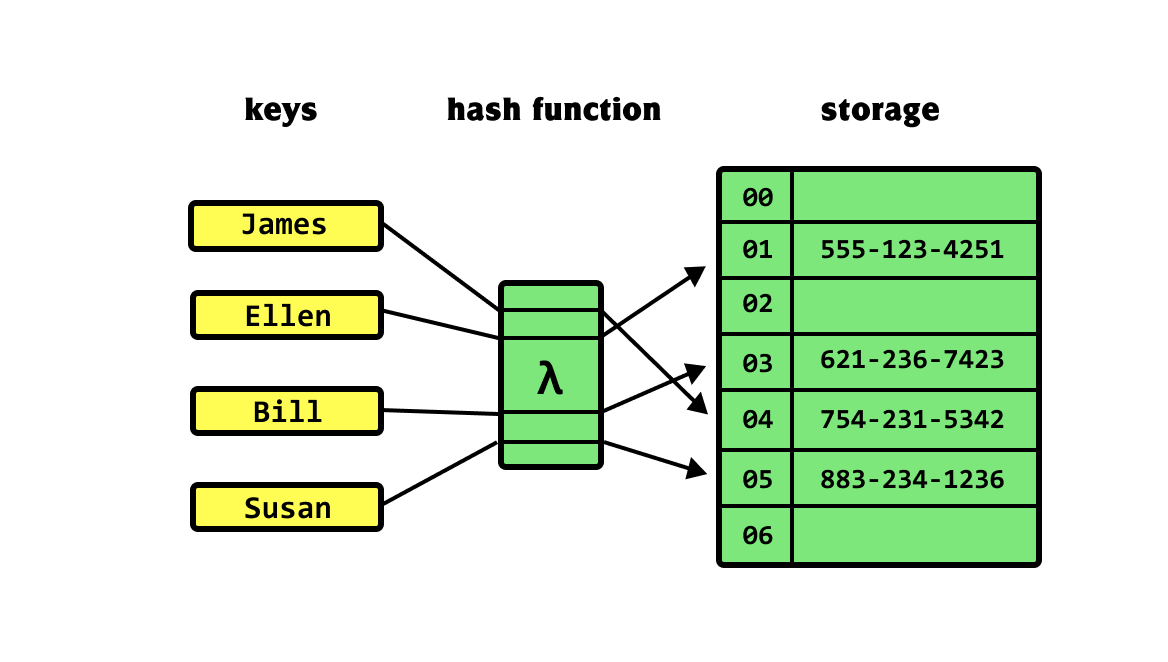
source: https://khalilstemmler.com/blogs/data-structures-algorithms/hash-tables/
	

## Dictionaries

Dictionaries is the Python's name for associative arrays or maps, which it implements by using hash tables.

Dictionaries are amazingly useful, even in simple programs.

## What is a dictionary?

A good way to start understanding the use of dictionaries is to compare them with lists:

* Value in lists are accessed by means of integers called **indices**, which indicate where in the list a given value is found.
* Diccionaries access values by means of integers, strings, or other Python objects called **key**, which indicate where in the dictionary a given value is found. The mechanism that dictionaries use to provide indexed access is quite different from that used by lists.
* Both lists and dictionaries can store objects of any type.
* Valies stored in a list are implicitly *ordered* by their positions in the list, because the indices that access these values are consecutive integers. Values stored in a dictionary are *not* implicitly ordered relaive to one another because dictionary keys aren't just numbers.

The use of dictionaries and lists often appears to be the same. An empty dictionary is created much like an empty list, but with curly braces instead of square brackets:

In [1]:
x = [] # Empty list
y = {} # Empty dictionary

After you create a dictionary, you may store values in it as though it were a list:

In [2]:
y[0] = "Hello"
y[1] = "Goodbye"

Trying to do the same thing with a list would result in an error, because in python its ilegal to assign to a position in a list that doesn't exist.

In [3]:
x[0] = "Hello"

IndexError: list assignment index out of range

Having stored some values in the dictionary, now you can access and use them:

In [4]:
y[0]

'Hello'

The big difference regard to lists: store (and use) some values under keys that aren't integers:

In [6]:
y["two"] = 2
y["pi"] = 3.1416
y["pi"] 

3.1416

Whereas list indices must be integers, dictionary keys are much less restricted: they may be numbers, strings, of one of a wide range of other Python objects.

It makes make more sense to implement a telephone-directory application with dictionaries than with list because the phone number for a person can be stored indexed by that person's last name.

**A dictionary is a way of mapping from one set of arbitrary objects to an associated but equally arbitrary set of objects**

A traduction dictionary is a good example:

In [9]:
english_to_spanish = {} # create empty dictionary
english_to_spanish["red"] = "rojo" # store value in it
english_to_spanish["blue"] = "azúl"
print("red is",english_to_spanish["red"]) # obtain value for "red"

red is rojo


## Other dictionary operations

You can define a dictionary explicitly as a series of key-value pairs separated by commas:


In [10]:
english_to_spanish = {"red" : "rojo", "blue" : "azul", "yellow" : "amarillo"}

<code>len</code> returns the number of entries in a dictionary:

In [11]:
len(english_to_spanish)

3

You can obtain all the keys in the dictionary with the <code>keys</code> method.

In [12]:
english_to_spanish.keys()

dict_keys(['red', 'blue', 'yellow'])

It's also possible to obtain all the values stored in a dictionary by using a <code>values</code>:

In [13]:
english_to_spanish.values()

dict_values(['rojo', 'azul', 'amarillo'])

You can use the <code>items</code> method to return all keys and their associated values as a sequence of tuples:

In [15]:
list(english_to_spanish.items())

[('red', 'rojo'), ('blue', 'azul'), ('yellow', 'amarillo')]

Attempting to acces a key that isn't in a dictionary is an error in Python

In [16]:
english_to_spanish["green"]

KeyError: 'green'

To handle this error, you can test the dictionary for the presence of a key with the <code>in</code> keyword, which returns <code>True</code> if a dictionary has a value stored under the given key and <code>False</code> otherwise:

In [17]:
"red" in english_to_spanish

True

In [18]:
"orange" in english_to_spanish

False

You can obtain a copy of a dictionary by using the copy method:

In [19]:
x = {0: "zero", 1 : "one"}
y = x.copy()
y

{0: 'zero', 1: 'one'}

This method makes a shallow copy of the dictionary, which is likely to be all you need in most situations.

For dictionaries that contains any modificable objects as values (for example, list or other dictionaries), you may want to make a deep copy by using the method <code>deepcopy</code>

The <code>update</code> method updates a first dictionary with all the key-value pairs of a second dictionary. For keys that are common to both dictionaries, the values from the second dictionary override those of the first:

In [20]:
z = {1 : "One", 2 : "Two"}
x = {0 : "Zero", 1: "one"}
z.update(x)
z

{1: 'one', 2: 'Two', 0: 'Zero'}

Dictionary methods give you a full set of tools to manipulate and use dictionaries. For quick reference, the next table lists some of the main dictionary functions. 
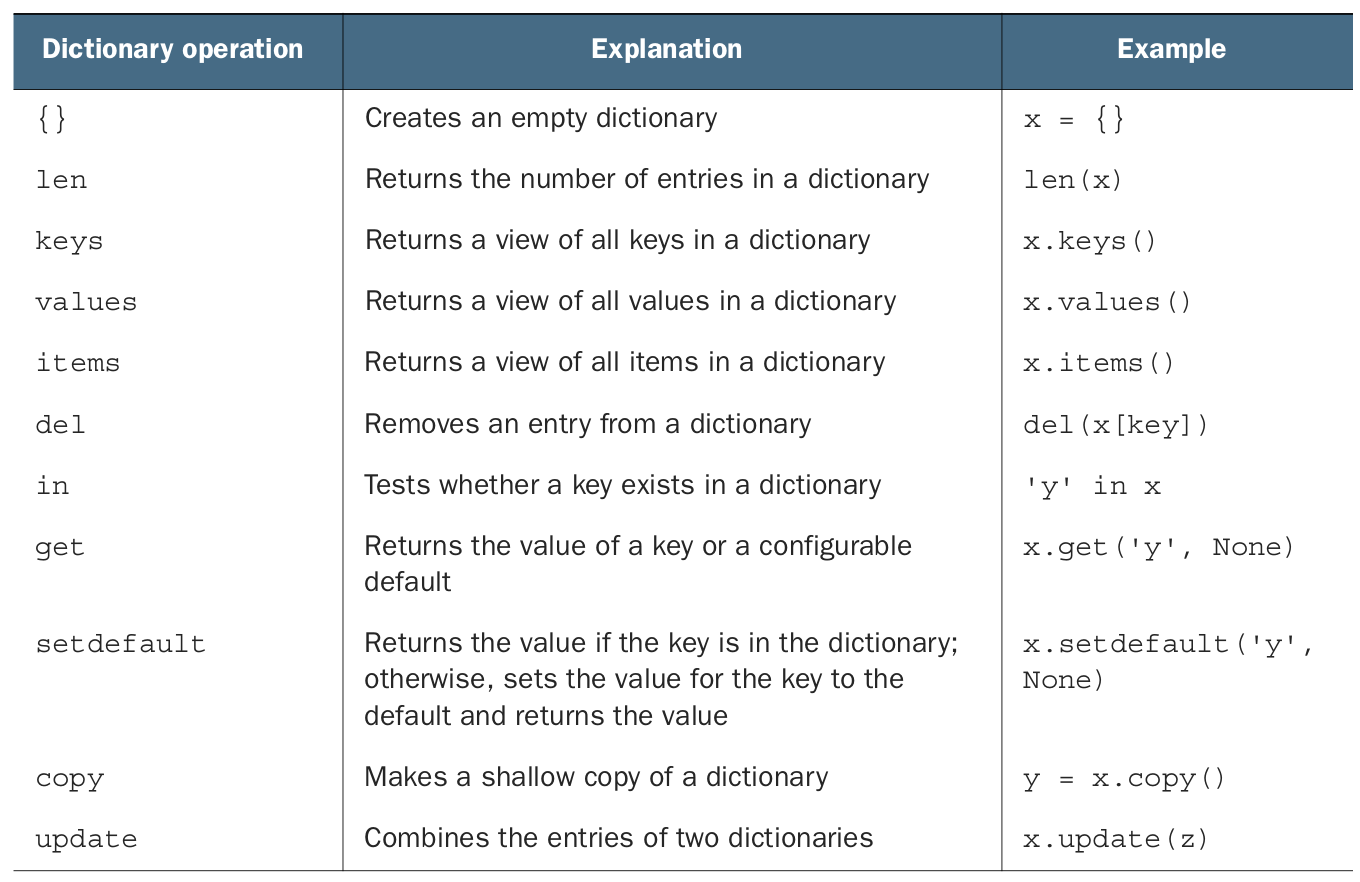

## Word counting
Assume that you have a file that contains a list of words, one word per line. You want to know how many times each word occurs in the file. You can use dictionaries to perform this task easily

In [26]:
sample_string = "To be or not to be"
occurrence = {}
for word in sample_string.split():
    occurrence[word] = occurrence.get(word,0) + 1
occurrence

{'To': 1, 'be': 2, 'or': 1, 'not': 1, 'to': 1}

## What can be used as key?

The previous examples use strings as keys, but Python permits more than just strings to be used in this manner. Any Python object that is immutable and hashable can be used as key to a dictionary.

In Python, any object that can be modified is called **mutable**. Examples:
* Lists
* Dictionaries

Integers, Strings and tuples are  **inmutable**. So we can use them as keys.

There's one further restriction: Key must also be hashable. To be hashable, a value must have a hash value (provided by a <code>__hash__</code> method) that never changes throughout the life of the value.

That means that tuples containing mutable values are **not** hashable, although the tuples themselves are technically inmutable.

In [32]:
x = (1,2,3,4)
x.__hash__()

485696759010151909

The next table ilustrates which of Python's built-in types are inmutable, hashable, and elegible to be dictionary keys:
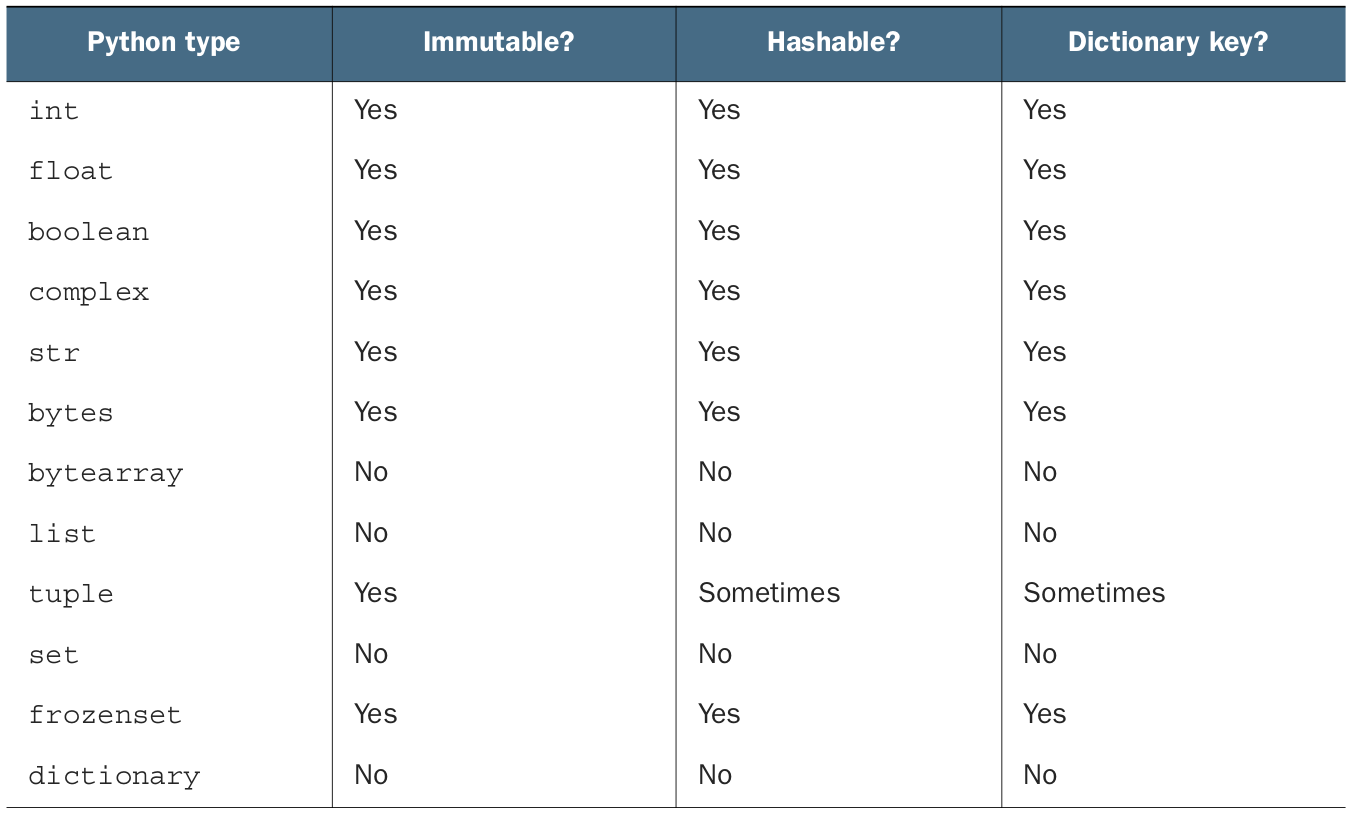

## Sparse matrices

This section give an example of how tuples and dictionaries can work together.

In mathematical terms, a **matrix** is a two-dimensional grid of numbers, usually written in textbooks as a grid with square brackets on each side.


\begin{bmatrix}
    3 & 0 & -2 & 11 \\
    0 & 9 &  0 & 0 \\
    0 & 7 &  0 & 0 \\
    0 & 0 &  0 & -5     
\end{bmatrix}

A fairly standar way to represent such a matrix is by means of list of lists. In Python, a matrix is presented like this:


In [33]:
matrix = [[3, 0, -2, 11], [0, 9, 0, 0],[0, 7, 0, 0],[0, 0, 0, -5]]
matrix

[[3, 0, -2, 11], [0, 9, 0, 0], [0, 7, 0, 0], [0, 0, 0, -5]]

Elements in the matrix can be accesed by row and column number:

<code>element  = matrix[rownum][colnum</code>

In some applications, such as weather forecasting, it's common for matrices to be very large. It's also common for such matrices to contain many zero elements. In some applications, all but a small percentage of the matrix elements may be set to zero. 

To conserve memory, it's common for such matrices to be stored in a form in which only the nonzero elements are actually stored. Such representations are called **sparse matrices**.

It's simple to implement sparse matrices by using dictionaries with tuple indices. The previous sparse matrix can be represented as follow:

In [36]:
matrix = {(0,0):3, (0,2):-2, (0,3):11,(1,1):9,(2,1):7,(3,3):-5}
matrix

{(0, 0): 3, (0, 2): -2, (0, 3): 11, (1, 1): 9, (2, 1): 7, (3, 3): -5}

Now you can access and individual matrix element at a given row and column number by this bit of code:

In [ ]:
if (rownum,colnum) in matrix:
    element = matrix[(rownum,colnum)]
else:
    element = 0